# Task 3 - MedSAM

Initially, I attempted to apply the MedSAM project to the CT data and evaluate the results obtained. However, the implementation of the project proved to be extremely time-consuming due to poorly commented code and the customization of examples and scripts for their own demo dataset. Despite these challenges, I managed to train a model. However, manual verification of individual CT scans using the trained model yielded highly unsatisfactory results. The performance was so poor that I couldn't rule out the possibility of a technical error during training or data preparation. Due to time constraints, I decided to forgo an automated evaluation of the results using a metric such as Intersection-Over-Union. Nevertheless, I will provide a brief overview of what I did, the scripts/notebooks I created, and the results obtained.

### Pre-Processing

I used parts of their pre_CT_MR.py script and adapted it to our dataset.

--> MedSAM/CT_Preprocessing.ipynb

### Split Train / Test

The authors did the splitting directly during pre-processing, which I don't find very elegant because it makes it difficult to test a different train/test combination later. I have therefore done the splitting separately.

--> MedSAM/raw_data/split_train_test.ipynb

### Training

I started the training process with the following parameters:

> python .\train_one_gpu.py --tr_npy_path .\raw_data\npy\train\ -checkpoint .\sam_vit_b_01ec64.pth -batch_size 1 -num_epochs 100

The training took about 8 hours (GTX 1080 Ti). I decided not to add any more epochs to the first 100, as the loss already converged. However, maybe I should have let the training go on a bit longer.

![](doc/MedSAM-ViT-Btrain_loss.png)

Convert the model to the SAM format:

> python .\ckpt_convert.py

### Evaluation

Before I wanted to carry out an excessive performance investigation, I first examined individual images manually as a test. As already described, the results were extremely poor. Even when testing images seen during training the results were very poor which indicates to me that I made an error somewhere. Some examples follow. The graphics were created with the gui.py provided by MedSAM. The first example is an outlier because the prediction and the actual mask are nearly identical.

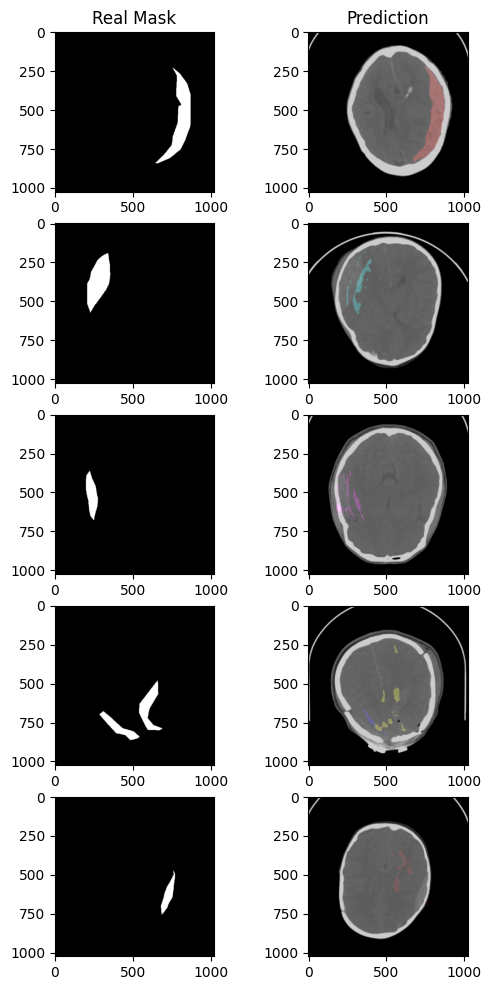

In [13]:
from matplotlib import pyplot as plt
from PIL import Image

samples = ["train/imgs/071-008",
           "train/imgs/075-006",
           "train/imgs/077-006",
           "train/imgs/094-008",
           "test/imgs/066-006",
           ]

fig, axs = plt.subplots(len(samples), 2, figsize=(6, 12))

for sample, i in zip(samples, range(len(samples))):
    prediction = Image.open('MedSAM/raw_data/png/' + sample + "_mask.png")
    real_mask = Image.open(f'MedSAM/raw_data/png/{sample}.png'.replace("imgs", "gts"))

    if i == 0:
        axs[i][0].set_title("Real Mask")
        axs[i][1].set_title("Prediction")

    axs[i][0].imshow(real_mask, cmap="gray")
    axs[i][1].imshow(prediction, cmap="gray")

plt.show()